In [167]:
import pandas as pd
df=pd.read_csv("testset.csv")

In [168]:

from scipy import stats
import numpy as np
#cleaning the data
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])
df.set_index('datetime_utc', inplace=True)
df=df.fillna(df.mean())
df=df.drop(' _precipm',axis=1)
print(df.head())



                     _conds   _dewptm   _fog   _hail   _heatindexm   _hum  \
datetime_utc                                                                
1996-11-01 11:00:00   Smoke       9.0      0       0      35.65171   27.0   
1996-11-01 12:00:00   Smoke      10.0      0       0      35.65171   32.0   
1996-11-01 13:00:00   Smoke      11.0      0       0      35.65171   44.0   
1996-11-01 14:00:00   Smoke      10.0      0       0      35.65171   41.0   
1996-11-01 16:00:00   Smoke      11.0      0       0      35.65171   47.0   

                      _pressurem   _rain   _snow   _tempm   _thunder  \
datetime_utc                                                           
1996-11-01 11:00:00       1010.0       0       0     30.0          0   
1996-11-01 12:00:00      -9999.0       0       0     28.0          0   
1996-11-01 13:00:00      -9999.0       0       0     24.0          0   
1996-11-01 14:00:00       1010.0       0       0     24.0          0   
1996-11-01 16:00:00       10

In [169]:
graph_df=df.resample('D').mean()
graph_df.head()


,_dewptm,_fog,_hail,_heatindexm,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
datetime_utc,,,,,,,,,,,,,,,,
1996-11-01,11.666667,0.0,0.0,35.651710,52.916667,-2659.666667,0.0,0.0,22.333333,0.0,0.0,2.351849,23.333333,37.671175,5.713817,6.375514
1996-11-02,10.458333,0.0,0.0,35.651710,48.625000,1009.833333,0.0,0.0,22.916667,0.0,0.0,3.342013,106.666667,37.671175,5.713817,7.984808
1996-11-03,12.041667,0.0,0.0,35.282889,55.958333,1010.500000,0.0,0.0,21.791667,0.0,0.0,2.296064,106.666667,37.671175,5.713817,5.044039
1996-11-04,10.222222,0.0,0.0,35.198837,48.055556,1011.333333,0.0,0.0,22.722222,0.0,0.0,2.339351,55.555556,37.671175,5.713817,2.282137
1996-11-05,8.200000,0.0,0.0,35.651710,29.400000,1011.800000,0.0,0.0,27.800000,0.0,0.0,3.900000,208.000000,37.671175,5.713817,10.020000


In [170]:
num_train = graph_df.select_dtypes(include=["number"])

In [171]:
#removing outliers
idx = np.all(stats.zscore(num_train) < 3, axis=1)

C:\Users\hitesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


In [172]:
num_train.head()

,_dewptm,_fog,_hail,_heatindexm,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
datetime_utc,,,,,,,,,,,,,,,,
1996-11-01,11.666667,0.0,0.0,35.651710,52.916667,-2659.666667,0.0,0.0,22.333333,0.0,0.0,2.351849,23.333333,37.671175,5.713817,6.375514
1996-11-02,10.458333,0.0,0.0,35.651710,48.625000,1009.833333,0.0,0.0,22.916667,0.0,0.0,3.342013,106.666667,37.671175,5.713817,7.984808
1996-11-03,12.041667,0.0,0.0,35.282889,55.958333,1010.500000,0.0,0.0,21.791667,0.0,0.0,2.296064,106.666667,37.671175,5.713817,5.044039
1996-11-04,10.222222,0.0,0.0,35.198837,48.055556,1011.333333,0.0,0.0,22.722222,0.0,0.0,2.339351,55.555556,37.671175,5.713817,2.282137
1996-11-05,8.200000,0.0,0.0,35.651710,29.400000,1011.800000,0.0,0.0,27.800000,0.0,0.0,3.900000,208.000000,37.671175,5.713817,10.020000


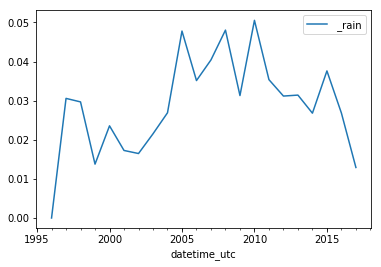

In [173]:
#plotting graphs
import matplotlib.pyplot as plt
num_train.resample('Y').mean().plot(y=" _rain")

Text(0.5,0,'_dewptm')

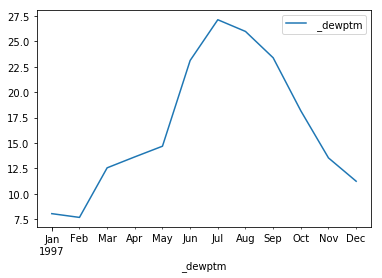

In [174]:
num_train.resample('M').mean()[2:14].plot(y=" _dewptm")
plt.xlabel("_dewptm")

Text(0.5,0,'month')

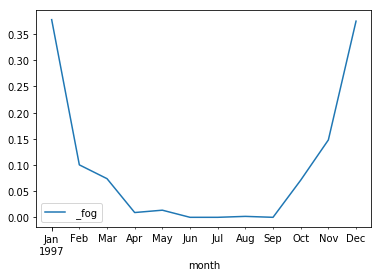

In [175]:
num_train.resample('M').mean()[2:14].plot(y=" _fog")
plt.xlabel("month")

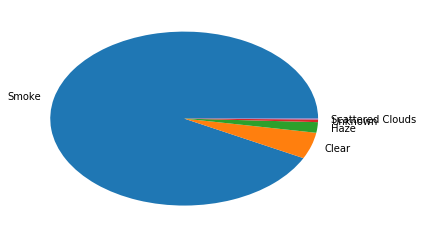

In [176]:
# pie chart of nov 1996
dic={}
df=pd.read_csv("testset.csv")

for i in df[" _conds"][:612]:
    if i not in dic:
        dic[i]=1
    else:
        dic[i]+=1
plt.pie(list(dic.values()),labels=list(dic.keys()))
plt.show()

    
    

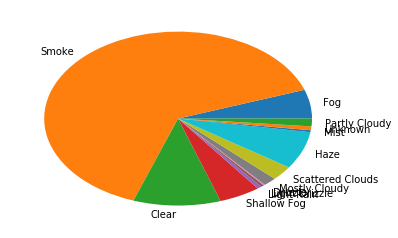

In [177]:
#pie chaart for feb 1997
dic={}
for i in df[" _conds"][1932:2491]:
    if i not in dic:
        dic[i]=1
    else:
        dic[i]+=1
plt.pie(list(dic.values()),labels=list(dic.keys()))
plt.show()